In [1]:
import json
import pandas as pd
import numpy as np

file = 'stats.json'

In [2]:
with open(file) as f:
    data = json.load(f)

In [3]:
sample = pd.DataFrame(data['North Carolina Central']['Team'], index = [0])

sample

In [4]:
sample

,g,mp,fg,fga,fg_pct,fg2,fg2a,fg2_pct,fg3,fg3a,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,pts_per_g
0,33,6625,850,1866,.456,638,1193,.535,212,673,...,387,840,1227,509,207,92,506,590,2355,71.4


In [5]:
cols = (sample.keys())

In [6]:
teams = list(data.keys())

In [7]:
df_team = pd.DataFrame(columns=cols)
index = 0

for i in teams:
    row = data.get(i)
    df_team = df_team.append(pd.DataFrame(row['Team'],index = [index]))
    index += 1
    
df_op = pd.DataFrame(columns=cols)
index = 0

for i in teams:
    row = data.get(i)
    df_op = df_op.append(pd.DataFrame(row['Opponent'],index = [index]))
    index += 1

In [8]:
df_team['Team'] = pd.DataFrame(teams)
df_op['Team'] = pd.DataFrame(teams)

In [9]:
df_team.to_csv(r'Team_stats.csv')
df_op.to_csv(r'Opp_stats.csv')

In [10]:
games = pd.read_csv('games.csv')
games.head()

,team1,team2,round,winner
0,Belmont,Temple,1,1
1,North Dakota State,North Carolina Central,1,1
2,Arizona State,St. John's (NY),1,1
3,Prairie View,Fairleigh Dickinson,1,0
4,Duke,North Dakota State,2,1


In [43]:
cols2 = list(cols)
cols2.append('Team')
full = pd.DataFrame()

team1_team = pd.DataFrame()
team2_team = pd.DataFrame()
team1_opp = pd.DataFrame()
team2_opp = pd.DataFrame()

index = 0
for i in games.T:
    
    team1 = games['team1'][i]
    team2 = games['team2'][i]
    
    indext1 = df_team.index[df_team['Team'] == team1]
    indext2 = df_team.index[df_team['Team'] == team2]
    indexo1 = df_team.index[df_op['Team'] == team1]
    indexo2 = df_team.index[df_op['Team'] == team2]
    team1_team = team1_team.append(df_team.iloc[indext1].add_prefix('t1t_'),ignore_index = True)
    team2_team = team2_team.append(df_team.iloc[indext2].add_prefix('t2t_'),ignore_index=True)
    team1_opp = team1_opp.append(df_op.iloc[indexo1].add_prefix('t1o_'),ignore_index = True)
    team2_opp = team2_opp.append(df_op.iloc[indexo2].add_prefix('t2o_'),ignore_index=True)
    
full = pd.concat([games, team1_team,team1_opp,team2_team,team2_opp], axis = 1)

full = full.drop(columns = ['t1t_Team', 't1o_Team', 't2t_Team', 't2o_Team'])

In [44]:
full['round'] = full['round'].astype('category')
full['winner'] = full['winner'].astype('category')

In [45]:
full.to_csv(r'Full_stats.csv')

PermissionError: [Errno 13] Permission denied: 'Full_stats.csv'

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import metrics

y = full['winner']
X = full.loc[:, 't1t_g':].astype('float')

X_stand = pd.DataFrame(preprocessing.scale(X))
X_norm = pd.DataFrame(preprocessing.normalize(X, axis = 0))

model = LogisticRegression()
model.fit(X, y)

score = model.score(X,y)
print(score)

1.0


C:\Users\ande5\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [47]:
predictions = model.predict(X)

In [48]:
cm = metrics.confusion_matrix(y, predictions)
print(cm)

[[29  0]
 [ 0 38]]


In [49]:
intercept = pd.DataFrame(model.intercept_, columns = ['intercept'])

In [50]:
coefs = model.coef_[0]

In [51]:
results = pd.DataFrame(coefs).T

In [52]:
col_rename_dict = {i:j for i,j in zip(results.columns,X.columns)}

In [53]:
results = results.rename(columns = col_rename_dict)

In [54]:
results = pd.concat([intercept, results], axis = 1)

In [55]:
results.to_csv(r'Results.csv')

In [56]:
predictions

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0], dtype=int64)

In [57]:
model.coef_

array([[-1.32132261e-03,  8.51587478e-03,  1.68377033e-02,
        -1.12488376e-02, -9.49567735e-05,  5.31082695e-02,
        -5.84758276e-02, -8.71159840e-05, -3.62705661e-02,
         4.72269900e-02, -1.35359905e-04,  3.69158584e-02,
        -2.85536101e-02, -7.17038255e-05,  6.60226986e-02,
        -3.88758385e-02,  2.71468600e-02, -5.68999383e-02,
         6.22991092e-02,  1.49425299e-01,  7.10858734e-02,
         6.31000250e-02,  3.10073274e-02, -1.60064700e-02,
        -1.32132261e-03,  8.51587478e-03,  1.83396283e-02,
        -2.28768692e-02, -7.78938602e-05,  2.92893433e-02,
        -1.33009464e-02, -5.78004541e-05, -1.09497150e-02,
        -9.57592279e-03, -7.99963753e-05, -5.07125090e-02,
         7.10297669e-03, -2.58405307e-04,  2.08137107e-02,
        -3.53219535e-02, -1.45082428e-02, -1.54366683e-01,
         1.31797916e-02, -6.14050160e-03, -6.45143252e-03,
        -1.03844717e-01, -2.50739928e-02, -1.49879706e-02,
        -5.65472159e-04,  1.32828672e-03,  8.71508844e-0

In [58]:
for feature in list(cols):
    full['t_'+feature] = (full['t1t_'+feature].astype('float') - full['t2t_'+feature].astype('float'))
    full['o_'+feature] = (full['t2t_'+feature].astype('float') - full['t2o_'+feature].astype('float'))

In [59]:
full.to_csv(r'Full_stats.csv')

PermissionError: [Errno 13] Permission denied: 'Full_stats.csv'

In [61]:
y2 = full['winner']
X2 = full.loc[:, 't_fg':].astype('float')

#X_stand = pd.DataFrame(preprocessing.scale(X))
#X_norm = pd.DataFrame(preprocessing.normalize(X, axis = 0))

model2 = LogisticRegression()
model2.fit(X2, y2)

score2 = model2.score(X2,y2)
print(score2)

0.9701492537313433


C:\Users\ande5\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [62]:
predictions2 = model2.predict(X2)
cm2 = metrics.confusion_matrix(y2, predictions2)
print(cm2)

[[27  2]
 [ 0 38]]


In [63]:
games['pred2'] = (y2 == predictions2)
games.to_csv(r'games_pred.csv')

In [64]:
coefs2 = model2.coef_[0]
results2 = pd.DataFrame(coefs2).T
intercept2 = pd.DataFrame(model2.intercept_, columns = ['intercept'])
col_rename_dict2 = {i:j for i,j in zip(results2.columns,X2.columns)}
results2 = results2.rename(columns = col_rename_dict2)
results2 = pd.concat([intercept2, results2], axis = 1)
results2.to_csv(r'Results2.csv')

In [66]:
new = full[['team1', 'team2', 'round', 'winner','t_fg_pct', 'o_fg_pct', 't_fg3', 'o_fg3', 't_ft_pct', 'o_ft_pct', 't_trb', 'o_trb', 't_ast', 'o_ast', 't_stl', 'o_stl', 't_blk', 'o_blk', 't_tov', 'o_tov', 't_pts_per_g', 'o_pts_per_g']]

In [67]:
import matplotlib.pyplot as plt

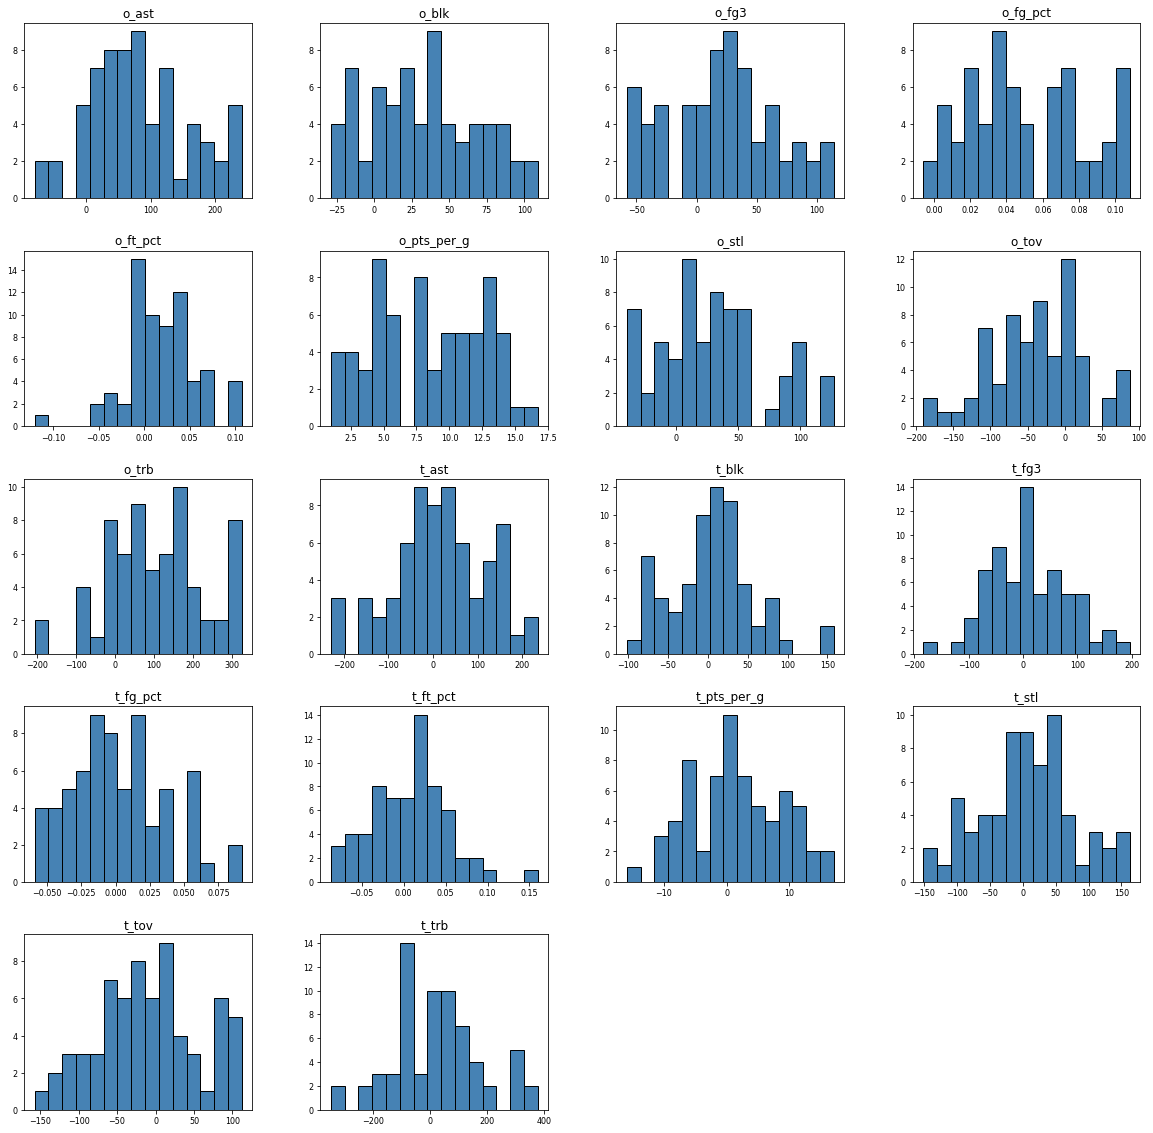

In [69]:
new.hist(bins = 15, color = "steelblue", edgecolor = "black", linewidth = 1.0, xlabelsize = 8, ylabelsize = 8, grid = False, figsize = (20,20))
plt.show()

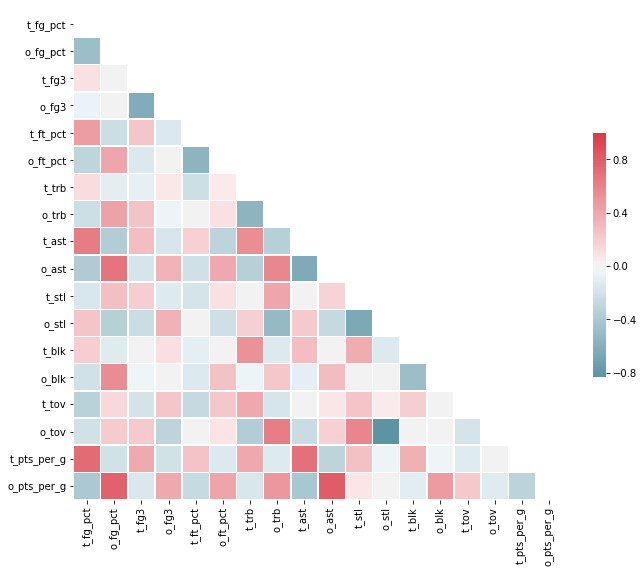

In [75]:
import seaborn as sns

corr = new.corr()

f, ax = plt.subplots(figsize=(11, 9))

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, mask=mask, center=0,
           square=True, linewidths=.5, cbar_kws={"shrink": .5})

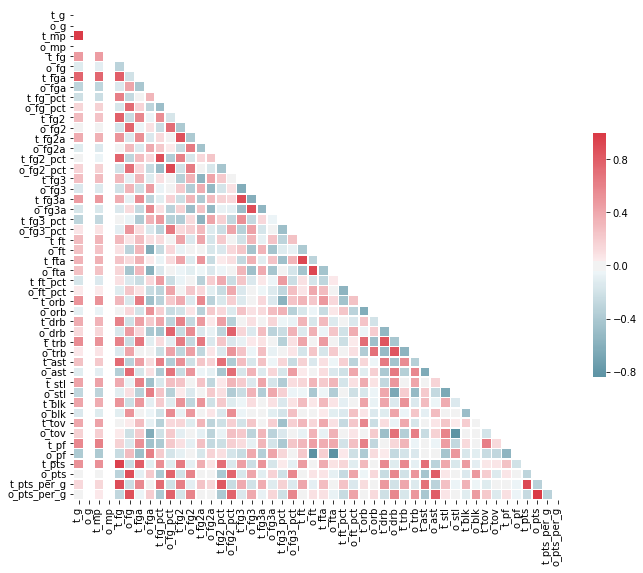

In [77]:
y3 = new['winner']
X3 = new.loc[:, 't_fg_pct':].astype('float')

model3 = LogisticRegression()
model3.fit(X3, y3)

score3 = model3.score(X3,y3)
print(score3)

0.7611940298507462


C:\Users\ande5\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [79]:
predictions3 = model3.predict(X3)
cm3 = metrics.confusion_matrix(y3, predictions3)
print(cm3)

[[19 10]
 [ 6 32]]


In [80]:
games['pred3'] = (y3 == predictions3)
games.to_csv(r'games_pred.csv')